## Introduction

In this Dengue Predicting Disease Spread challenge, we need to predict the total dengue cases reported for each city in each year and weekofyear. Based on the predicted data,the responsible agencies can take action to prevent it.

#### Some known facts about Dengue :
Dengue is a viral disease transmitted by some types of mosquitoes. Dengue outbreaks occur in each year. And dengue does not spread from person to person and is transmitted through the bite of an infected mosquito( Aedes aegypti and Aedes albopictus species of mosquito ). Mosquitoes become infected with dengue after biting sick humans who have dengue virus in their blood. Between 8 and 12 days later if an infected mosquito bites someone else it can pass on the dengue virus. this disease causes illness that can range from a mild fever to a severe, even fatal condition.

How to Prevent : Avoiding mosquito bites is the best prevention

#### Effects of weather factors on dengue fever:
Temperature, rainfall and humidity have well-defined roles in the Dengue transmission cycle. Prolonged periods of heavy rain increase the opportunities for the diseases to spread. Longer seasons of mild temperatures may increase the transmission likelihood of dengue diseases. In warmer temperatures, dengue become infectious more quickly and can transmit virus earlier in their lives. In addition, the temperature must be “just right”; if too cold, the virus takes too long to replicate, and if too hot, the dengue virus lifespans are decreased. Humidity has been identified as a consistent, substantial weather factor to provide favorable conditions for dengue. But the dengue incidence and weather factors also apparently varies by locality.

### Mosquito life cycle
The life cycle of Aedes aegypti can be completed within one-and-a-half to three weeks. Male mosquitoes live three to five days. The females live considerably longer, depending on how much warmth and moisture is in their environment. Under ideal conditions, they may last as long as a month or two.
![alt text](./../images/lifeCycle.png "Mosquito life cycle")


The data contains weather variables( temperature, precipitation , humidity ) and satellite imagery measurements of vegetation are available. 

In the following we will explore the data, prepare it for a model, train a model and predict the target value for the test set, then prepare a submission.

#### Data Source
Using environmental data collected by various U.S. Federal Government agencies—from the Centers for Disease Control and Prevention to the National Oceanic and Atmospheric Administration in the U.S. Department of Commerce

This interagency project will assess forecasts using historical data from Iquitos, Peru and San Juan, Puerto Rico. https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/

###### Quick Facts About Iquitos and San Juan
###### San Juan
San Juan, Puerto Rico's capital and largest city, sits on the island's Atlantic coast.

 • Land	47.9 sq mi (124 km2).
 • Water	29.1 sq mi (75 km2)  37.8%.
 • Population : 395,326 ( as per 2010 census ).
 
In San Juan, the summers are long, hot, wet, and mostly cloudy; the winters are warm, windy, and mostly clear; and it is oppressive year round. 
Over the course of the year, the temperature typically varies from 22°C to 31°C and is rarely below 20°C or above 33°C.
The hot season lasts for 4.9 months, from May 26 to October 23, with an average daily high temperature above 31°C. The hottest day of the year is August 21, with an average high of 31°C and low of 25°C. The cool season lasts for 3.1 months, from December 6 to March 9, with an average daily high temperature below 29°C. The coldest day of the year is January 25, with an average low of 22°C and high of 28°C.
The wetter season lasts 7.3 months, from April 24 to December 2, with a greater than 35% chance of a given day being a wet day. The chance of a wet day peaks at 50% on September 26.
The drier season lasts 4.7 months, from December 2 to April 24. The smallest chance of a wet day is 20% on January 9. 
Rain falls throughout the year in San Juan. The most rain falls during the 31 days centered around September 18, with an average total accumulation of 121 millimeters. The least rain falls around January 11, with an average total accumulation of 32 millimeters.


###### Iquitos
Iquitos is a Peruvian port city and gateway to the jungle lodges and tribal villages of the northern Amazon. Its district of Belén is known for its massive open-air street market and rustic stilt houses lining the Itaya River.

 • Land	784 km2 (302.6 sq mi)
 • Water	340 km2 (132 sq mi)
 • Population 377,609(2017)
 
In Iquitos, the summers are hot and overcast; the winters are short, warm, and partly cloudy; and it is oppressive and wet year round. Over the course of the year, the temperature typically varies from 22°C to 32°C and is rarely below 20°C or above 34°C.
The hot season lasts for 3.1 months, from August 30 to December 1, with an average daily high temperature above 31°C. The hottest day of the year is October 4, with an average high of 32°C and low of 23°C.

The cool season lasts for 1.8 months, from May 29 to July 24, with an average daily high temperature below 30°C. The coldest day of the year is July 19, with an average low of 22°C and high of 30°C.
The wetter season lasts 7.9 months, from October 11 to June 8, with a greater than 47% chance of a given day being a wet day. The chance of a wet day peaks at 60% on March 23.

The drier season lasts 4.1 months, from June 8 to October 11. The smallest chance of a wet day is 34% on July 30.
Rain falls throughout the year in Iquitos. The most rain falls during the 31 days centered around April 3, with an average total accumulation of 264 millimeters.

![alt text](./../images/Loc_map.JPG "Location Map")

## Prepare for data analysis

## Load packages

In [84]:
%matplotlib inline    
# Line magic command will make plot outputs appear and be stored within the notebook.
import matplotlib.pyplot as plt   # matplotlib's plotting framework

import numpy as np    # fundamental package for scientific computing
import pandas as pd   # Python Data Analysis Library
#from pandas import Series # one-dimensional labeled array capable of holding any data type 
import seaborn as sns # library for making statistical graphics in Python
import os             # operating system dependent functionality, file descriptor..

#from sklearn.linear_model import LinearRegression                # base model for linear regression
#from sklearn.linear_model import LassoCV                         # least absolute shrinkage and selection operator
#from sklearn.linear_model import RidgeCV                         # ridge regression
#from sklearn.feature_selection import RFECV                      # Recursive feature elimination with CV

#import statsmodels.api as sm                                     # Poission and Negative binomial regression
#import statsmodels.formula.api as smf                            # statistical models formula APIs

#from sklearn.model_selection import GridSearchCV                 # Exhaustive search over specified parameter values for an estimator
#from sklearn.ensemble import RandomForestRegressor               # A random forest regressor
#import xgboost as xgb                                            # optimized distributed gradient boosting library


#from statsmodels.tsa.stattools import adfuller                  # Augmented Dickey-Fuller test tests the null hypothesis that a unit root is present in a time series

#from statsmodels.graphics.tsaplots import plot_acf, plot_pacf    # Auto correlation and Partial auto correlation plot
#from pandas.plotting import autocorrelation_plot                 #  for checking randomness in time series

#from sklearn.model_selection import train_test_split             # Split arrays or matrices into random train and test subsets
#from sklearn.feature_selection import f_regression               # feature selection procedure
#from sklearn.feature_selection import SelectKBest                # Feature selection technique

#from sklearn.metrics import mean_absolute_error                  # Mean absolute error regression loss
#from sklearn.metrics import median_absolute_error                # Median absolute error regression loss

import warnings
warnings.filterwarnings('ignore')                                # For warning control

## Load data

In [85]:
# Let's check what data files are available.
IS_LOCAL = False
if(IS_LOCAL):
    PATH="../input/Dengue/"
else:
    PATH="./../Data/"
os.listdir(PATH)

['dengue_features_test.csv',
 'dengue_features_train.csv',
 'dengue_labels_train.csv',
 'submission_format.csv']

In [86]:
# let's load the train and test data
# As per the manual verification of the csv files, got a basic understanding about the data.
#     Identified the date column as one of the feature
dengue_train_target    = pd.read_csv( PATH + 'dengue_labels_train.csv' )
dengue_test_features   = pd.read_csv( PATH + 'dengue_features_test.csv', parse_dates=[3] )
dengue_train_features  = pd.read_csv( PATH + 'dengue_features_train.csv', parse_dates=[3] )

## Data exploration

### Check the data dimension

In [87]:
dengue_train_features.shape

(1456, 24)

In [88]:
dengue_train_target.shape

(1456, 4)

In [89]:
dengue_test_features.shape

(416, 24)

##### Train data has 1456 entries and 24 columns. and test  data also have 24 columns of features.

## Data Preview

In [90]:
dengue_train_features.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [91]:
dengue_train_target.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


In [92]:
dengue_test_features.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,...,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,...,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,...,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,...,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,...,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


In [93]:
dengue_train_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 24 columns):
city                                     1456 non-null object
year                                     1456 non-null int64
weekofyear                               1456 non-null int64
week_start_date                          1456 non-null datetime64[ns]
ndvi_ne                                  1262 non-null float64
ndvi_nw                                  1404 non-null float64
ndvi_se                                  1434 non-null float64
ndvi_sw                                  1434 non-null float64
precipitation_amt_mm                     1443 non-null float64
reanalysis_air_temp_k                    1446 non-null float64
reanalysis_avg_temp_k                    1446 non-null float64
reanalysis_dew_point_temp_k              1446 non-null float64
reanalysis_max_air_temp_k                1446 non-null float64
reanalysis_min_air_temp_k                1446 non-null float64
reanalysi

In [94]:
dengue_train_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 4 columns):
city           1456 non-null object
year           1456 non-null int64
weekofyear     1456 non-null int64
total_cases    1456 non-null int64
dtypes: int64(3), object(1)
memory usage: 45.6+ KB


In [95]:
dengue_test_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 24 columns):
city                                     416 non-null object
year                                     416 non-null int64
weekofyear                               416 non-null int64
week_start_date                          416 non-null datetime64[ns]
ndvi_ne                                  373 non-null float64
ndvi_nw                                  405 non-null float64
ndvi_se                                  415 non-null float64
ndvi_sw                                  415 non-null float64
precipitation_amt_mm                     414 non-null float64
reanalysis_air_temp_k                    414 non-null float64
reanalysis_avg_temp_k                    414 non-null float64
reanalysis_dew_point_temp_k              414 non-null float64
reanalysis_max_air_temp_k                414 non-null float64
reanalysis_min_air_temp_k                414 non-null float64
reanalysis_precip_amt_kg_

###### Checking columns having null values

In [96]:
dengue_train_features.isna().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

The larget missing count is in ndvi_ne( 194 / 1456 ). it is less than 15% of train data.

In [97]:
dengue_test_features.isna().sum()

city                                      0
year                                      0
weekofyear                                0
week_start_date                           0
ndvi_ne                                  43
ndvi_nw                                  11
ndvi_se                                   1
ndvi_sw                                   1
precipitation_amt_mm                      2
reanalysis_air_temp_k                     2
reanalysis_avg_temp_k                     2
reanalysis_dew_point_temp_k               2
reanalysis_max_air_temp_k                 2
reanalysis_min_air_temp_k                 2
reanalysis_precip_amt_kg_per_m2           2
reanalysis_relative_humidity_percent      2
reanalysis_sat_precip_amt_mm              2
reanalysis_specific_humidity_g_per_kg     2
reanalysis_tdtr_k                         2
station_avg_temp_c                       12
station_diur_temp_rng_c                  12
station_max_temp_c                        3
station_min_temp_c              

##### Exploring the distribution of Target Feature


0      100
6       71
3       70
5       70
2       69
1       59
7       58
4       56
8       44
9       43
11      40
10      39
17      36
13      34
14      31
16      31
12      29
18      28
21      24
20      21
23      20
15      20
26      20
25      19
30      18
19      17
28      16
29      16
22      16
31      15
      ... 
359      1
364      1
381      1
395      1
410      1
169      1
126      1
150      1
104      1
77       1
426      1
78       1
81       1
58       1
90       1
91       1
99       1
101      1
108      1
149      1
115      1
119      1
74       1
128      1
131      1
135      1
137      1
141      1
142      1
461      1
Name: total_cases, Length: 135, dtype: int64

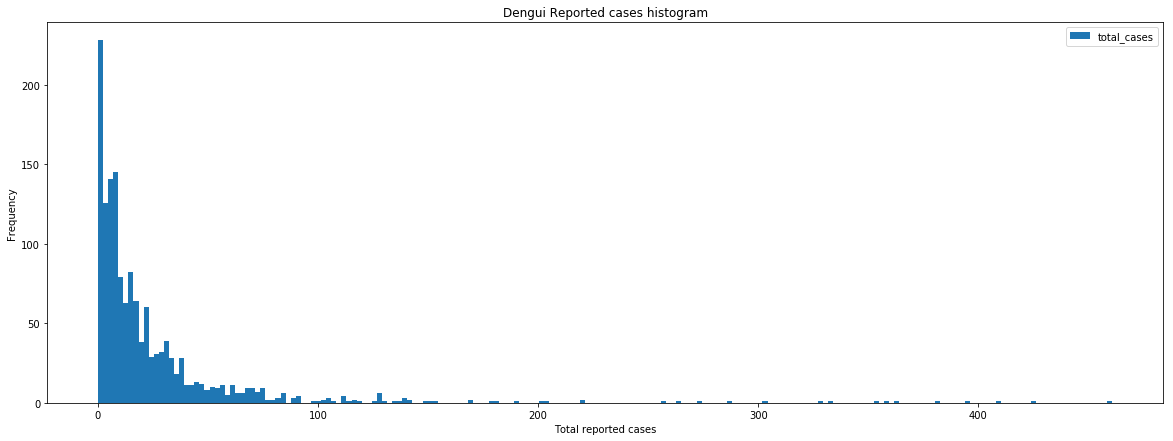

In [98]:
plt.figure( figsize=( 20, 7 ))
dengue_train_target.total_cases.plot.hist( bins = 200 )
plt.title('Dengui Reported cases histogram')
plt.xlabel('Total reported cases')
plt.ylabel('Frequency')
plt.legend()
dengue_train_target.total_cases.value_counts()

- Almost all the weeks reported cases are less than 50
- Very less number of cases reported after 150
- We need to verify whether the peaks has any relation with weather or not.

In [99]:
dengue_train_target.describe().T

,count,mean,std,min,25%,50%,75%,max
year,1456.0,2001.031593,5.408314,1990.0,1997.00,2002.0,2005.00,2010.0
weekofyear,1456.0,26.503434,15.019437,1.0,13.75,26.5,39.25,53.0
total_cases,1456.0,24.675137,43.596000,0.0,5.00,12.0,28.00,461.0


1. As per the target feature distribution, it is count based dependent variable. as per the mean and variance, data is showing more dispersed behaviour.
2. The data is not imbalanced. But lot of peaks are there in the total_cases column( after 75 percentile ).

##### Data Exploration

######  Checking duplicate rows

In [100]:

np.sum(dengue_train_features.duplicated())

0

In [101]:
np.sum(dengue_test_features.duplicated())

0

In [102]:
np.sum(dengue_train_target.duplicated())

0

In [103]:
# As per the file comparison of columns(city	year	weekofyear) in 
# dengue_features_train.csv and dengue_labels_train.csv. Its matching. adding total_cases column to main dataframe
dengue_train_features = pd.merge( dengue_train_features, dengue_train_target, on = ['city','year','weekofyear'], how ='left')
dengue_train_features.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


###### Generate Descriptive Statistics

This summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

In [104]:
dengue_train_features.describe().T

,count,mean,std,min,25%,50%,75%,max
year,1456.0,2001.031593,5.408314,1990.000000,1997.000000,2002.000000,2005.000000,2010.000000
weekofyear,1456.0,26.503434,15.019437,1.000000,13.750000,26.500000,39.250000,53.000000
ndvi_ne,1262.0,0.142294,0.140531,-0.406250,0.044950,0.128817,0.248483,0.508357
ndvi_nw,1404.0,0.130553,0.119999,-0.456100,0.049217,0.121429,0.216600,0.454429
ndvi_se,1434.0,0.203783,0.073860,-0.015533,0.155087,0.196050,0.248846,0.538314
ndvi_sw,1434.0,0.202305,0.083903,-0.063457,0.144209,0.189450,0.246982,0.546017
precipitation_amt_mm,1443.0,45.760388,43.715537,0.000000,9.800000,38.340000,70.235000,390.600000
reanalysis_air_temp_k,1446.0,298.701852,1.362420,294.635714,297.658929,298.646429,299.833571,302.200000
reanalysis_avg_temp_k,1446.0,299.225578,1.261715,294.892857,298.257143,299.289286,300.207143,302.928571
reanalysis_dew_point_temp_k,1446.0,295.246356,1.527810,289.642857,294.118929,295.640714,296.460000,298.450000


In [105]:
dengue_test_features.describe().T

,count,mean,std,min,25%,50%,75%,max
year,416.0,2010.766827,1.434835,2008.000000,2010.000000,2011.000000,2012.000000,2013.000000
weekofyear,416.0,26.439904,14.978257,1.000000,13.750000,26.000000,39.000000,53.000000
ndvi_ne,373.0,0.126050,0.164353,-0.463400,-0.001500,0.110100,0.263329,0.500400
ndvi_nw,405.0,0.126803,0.141420,-0.211800,0.015975,0.088700,0.242400,0.649000
ndvi_se,415.0,0.207702,0.079102,0.006200,0.148670,0.204171,0.254871,0.453043
ndvi_sw,415.0,0.201721,0.092028,-0.014671,0.134079,0.186471,0.253243,0.529043
precipitation_amt_mm,414.0,38.354324,35.171126,0.000000,8.175000,31.455000,57.772500,169.340000
reanalysis_air_temp_k,414.0,298.818295,1.469501,294.554286,297.751429,298.547143,300.240357,301.935714
reanalysis_avg_temp_k,414.0,299.353071,1.306233,295.235714,298.323214,299.328571,300.521429,303.328571
reanalysis_dew_point_temp_k,414.0,295.419179,1.523099,290.818571,294.335714,295.825000,296.643571,297.794286


- Feature values are dispersed, std is high.
- we can see a big gap betwen 75% and max
- Missing values are there
- Features, as per unit, its in the range, but still we need to convert the unit( kelvin to celcious ).

###### Plot total dengue reported cases over time

In [106]:
debug_test = True # assert variable

In [107]:
len(list(dengue_train_features['year'].unique()))

21

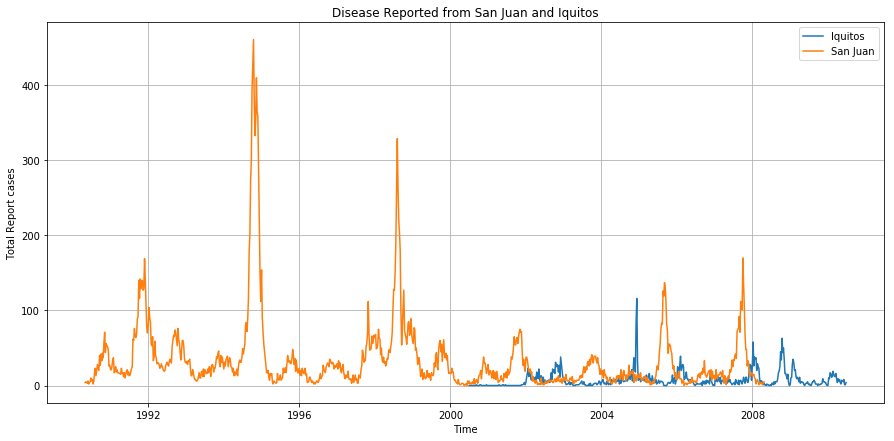

In [108]:
if debug_test:
    plt.figure( figsize=( 15, 7 ))
    for city_name in ['iq', 'sj']:
        data = dengue_train_features[dengue_train_features['city'] == city_name ]
        plt.xlabel('Time')
        plt.ylabel('Total Report cases')
        city_name = "Iquitos" if city_name == 'iq' else "San Juan"        # sj for San Juan and iq for Iquitos
        plt.plot(data.week_start_date,data['total_cases'], label=city_name)
    plt.title( 'Disease Reported from San Juan and Iquitos') 
    plt.grid()
    plt.legend()
    plt.show()

- As per graph. there is dengue outbreak happened in 1991-92, 1994, 1998, 2007-08.
- In Iquitos, the reported cases are less compared to Sanjuan. The max we can see in 2005.
- there is  no yearly pattern for this data

In [109]:
# Now we are creating the new features from week_start_date column, this requird to analyze the monthly data
dengue_train_features['month']   =  dengue_train_features['week_start_date'].dt.month
dengue_train_features['quarter'] =  dengue_train_features['week_start_date'].dt.quarter
dengue_test_features['month']    =  dengue_test_features['week_start_date'].dt.month
dengue_test_features['quarter']  =  dengue_test_features['week_start_date'].dt.quarter
# as per the modeling, we didn't any feature importance to quarter. but still we are keeping it.

In [110]:
# setting the week_start_date as index
dengue_train_features.set_index('week_start_date',inplace=True)
dengue_test_features.set_index('week_start_date',inplace=True)

##### Yearwise pattern of each city

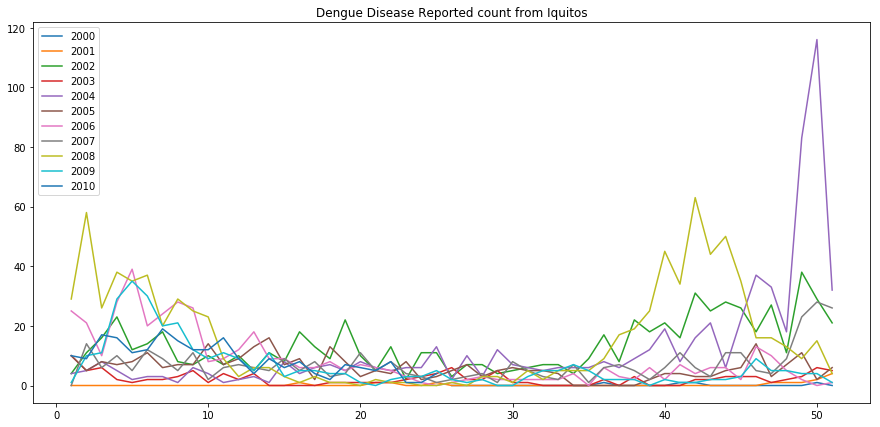

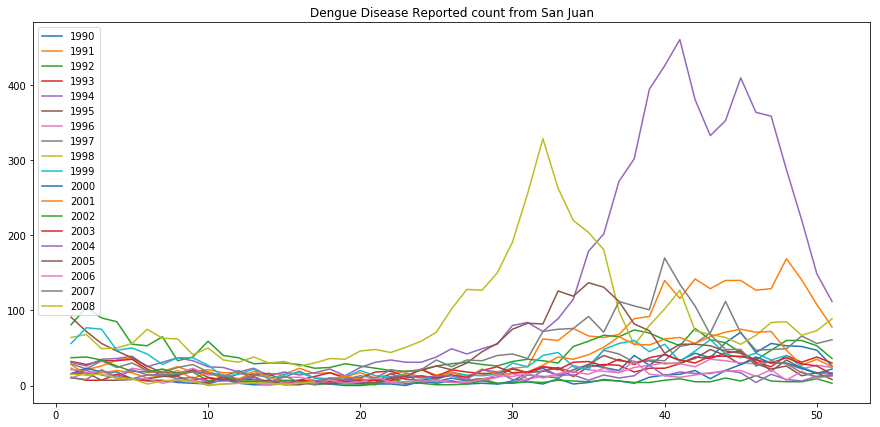

In [111]:
debug_test = True
#if debug_test:
for city in ['iq', 'sj']:
    plt.figure( figsize=( 15, 7 ))
    data = dengue_train_target[dengue_train_target['city'] == city ]
    for year in data['year'].unique():
        yearwiseData = pd.DataFrame(data[(data['year'] == year) & (data['weekofyear'] < 52)], columns = ['weekofyear','total_cases'])
        plt.plot( yearwiseData['weekofyear'],yearwiseData['total_cases'], label=year)
    city_name = "Iquitos" if city == 'iq' else "San Juan"        # sj for San Juan and iq for Iquitos
    plt.title( 'Dengue Disease Reported count from ' +  city_name )
    plt.legend()
    plt.show()
# since data is based on weeks, sometimes the last week is a combination of two years.
# so the graph lines are connected, so i skiiped the last week data

- The distribution of total cases reported per week of each year is not simmilar.
- In San Juan, the peaks are the week range of 1-10 & 36-52. For Iquitos, its from 28 to 50.

In [112]:
def plotCasesReportedPeriodWise( data, period, ytick_start = 50,  ytick_end = 7000, y_step = 500 ):
    sj_max_cases = data[data['city'] == 'sj'].groupby([period])['total_cases'].agg('sum')
    iq_max_cases = data[data['city'] == 'iq'].groupby([period])['total_cases'].agg('sum')
    plt.figure( figsize=( 15, 7 ))
    plt.xlabel( period )
    plt.ylabel('Total Cases of Dengue')
    plt.plot( sj_max_cases, label='San Juan data' )
    plt.plot( iq_max_cases, label='Iquitos data')
    plt.yticks(np.arange(ytick_start,ytick_end, step=y_step))
    plt.legend()
    plt.title( 'Total number of Dengue cases reported in each ' + period )
    plt.show()

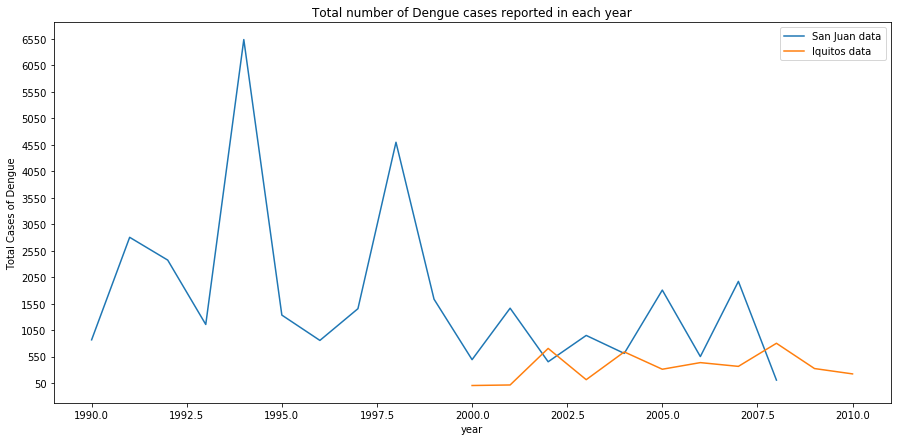

In [113]:
plotCasesReportedPeriodWise( dengue_train_target, 'year' )

Looks like, the required precautions are not handled before 2000.

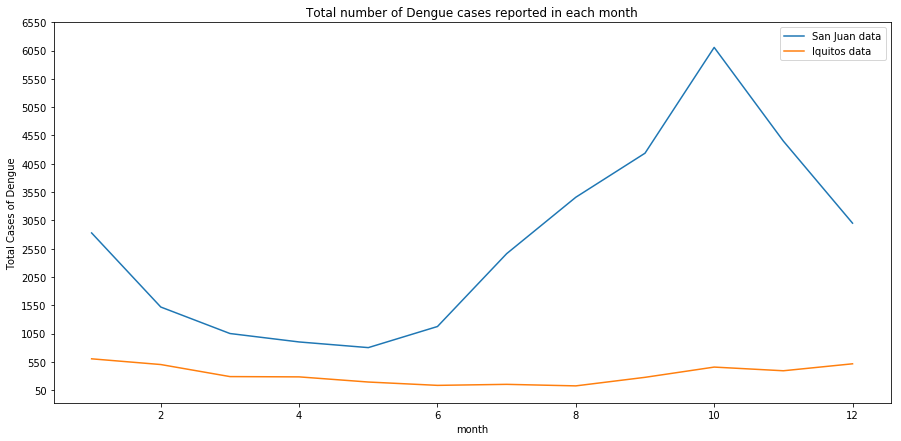

In [114]:
plotCasesReportedPeriodWise( dengue_train_features, 'month' )

The 1990 to 1999 data is affecting this monthly chart. Lets split the data and consider the data from from 1999 for our analysis.

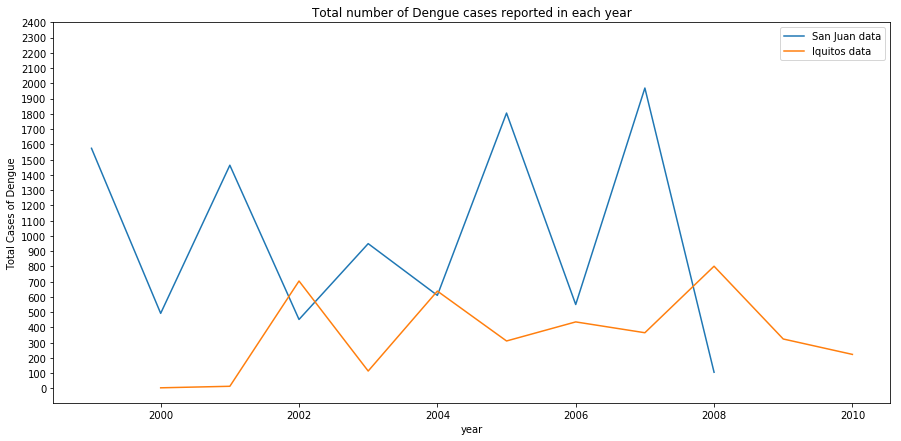

In [115]:
dengue_train_features_from1999 = dengue_train_features[dengue_train_features.index >  '01-Jan-1999'].copy()
plotCasesReportedPeriodWise( dengue_train_features_from1999, "year", 0, 2500,100 )

- Looks like, for Iquitos, the average total cases reported in each year is ~500.
- For San juan, there is no pattern. peak reached to ~2000 cases


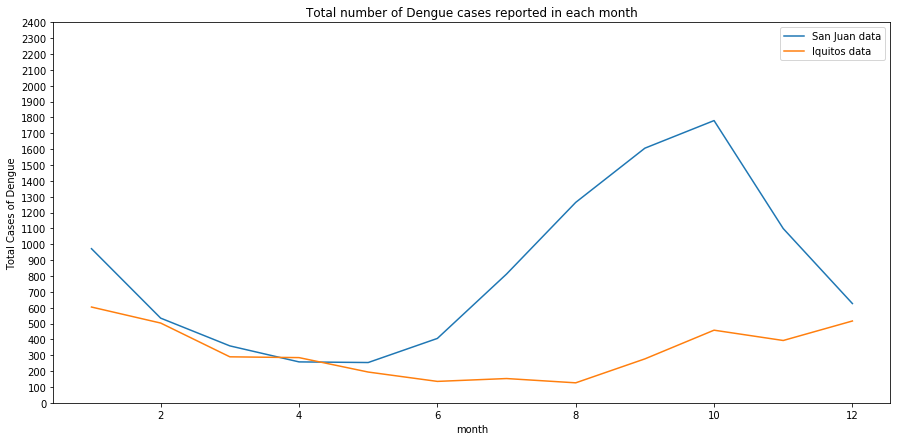

In [116]:
plotCasesReportedPeriodWise( dengue_train_features_from1999, "month", 0, 2500,100 )

   - Most of the reported cases are in the end of year ( months 8,9,10,11 )
   - Less number of cases are reported in May month
      - From that we can understand that season plays a major role in dengue diseasse spreading
   - A seasonal pattern of minimal occurrence of diseasse is from March to June
   - Disease spread peak is from September to November.
   - As pr the data, from 2000, the reported cases are reduced compared to earlier years.
   

##### Let's check the missing data and its datatype

###### month and quarter column

In [117]:
#dengue_train_features['month']    =  dengue_train_features['month'].astype('category')
#dengue_train_features['quarter']  =  dengue_train_features['quarter'].astype('category')

In [118]:
#dengue_test_features['month']     =  dengue_test_features['month'].astype('category')
#dengue_test_features['quarter']   =  dengue_test_features['quarter'].astype('category')

First we tried with month and quarter as category varaiable. 
Some  models considered month as a good feature. but later we splitted the data based on month. So we are commenting this.

###### city column

In [119]:
# start with the city column in train data
# In city column, 1456 entries are available
dengue_train_features['city'].unique()

array(['sj', 'iq'], dtype=object)

In [120]:
dengue_test_features['city'].unique()

array(['sj', 'iq'], dtype=object)

In [121]:
# we can consider the city feature as category, because only two city names are there. sj for San Juan and iq for Iquitos
# dengue_train_features['city'] = dengue_train_features['city'].astype('category')
# later we are going to split the data based on city column and after that this column is not required.

###### Year column

In [122]:
# year column contains 1456 entries
dengue_train_features['year'].unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010],
      dtype=int64)

In [123]:
dengue_test_features['year'].unique()

array([2008, 2009, 2010, 2011, 2012, 2013], dtype=int64)

In [124]:
# All the values in the year column are expected values
# but the data type int64 is not required to store year value
dengue_train_features['year'] = dengue_train_features['year'].astype('int16')
dengue_test_features['year'] = dengue_test_features['year'].astype('int16')
# we can consider this feature as categorical too. But there is no relvence of year feature in dengue prediction.
# later we can consider this feature for splitting the data.

###### weekofyear column

In [125]:
# weekofyear column contains 1456 entries

In [126]:
dengue_train_features['weekofyear'].unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 53], dtype=int64)

In [127]:
# All the values in the year column are expected values
# but the data type int64 is not required to store weekofyear value
dengue_train_features['weekofyear'] = dengue_train_features['weekofyear'].astype('int8')
dengue_test_features['weekofyear'] = dengue_test_features['weekofyear'].astype('int8')
# we can consider this feature as categorical too. In model creation time, we will recheck that.

In [128]:
dengue_test_features['weekofyear'].unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 53], dtype=int64)

###### week_start_date column


In [129]:
# week_start_date column contains 1456 entries
# And we set week_start_date column as index. No further changes are required.

In [130]:
#dengue_train_features = pd.get_dummies( dengue_train_features, columns=[ 'month','quarter'] )
#dengue_test_features = pd.get_dummies( dengue_test_features, columns=[ 'month','quarter'] )
# after data analysis, we decided to split the data based on month too.
# And there is no improvement in model results when we considered this as categorical variable.

#### Data Splitting based on city column

Before analyzing the next set feautures, we need to split the data.
This dataset has two cities in it: San Juan, Puerto Rico (sj) and Iquitos, Peru (iq). 
The spread of dengue may follow different patterns between the two cities. So the dataset should be partitioned in to two sets.
And in the balance features, lot of data is missing.  We need to impute the features with the splited data set.

In [131]:
dengue_train_sj = dengue_train_features[dengue_train_features['city'] == 'sj'].copy()
dengue_train_iq = dengue_train_features[dengue_train_features['city'] == 'iq'].copy()
dengue_test_sj = dengue_test_features[dengue_test_features['city'] == 'sj'].copy()
dengue_test_iq = dengue_test_features[dengue_test_features['city'] == 'iq'].copy()

In [132]:
def plotMissingData( data, featureCount):
    fontSize = 20
    fig, axis = plt.subplots(figsize=(15,10))
    sns.heatmap(data.iloc[:,2:featureCount].isnull().reset_index(drop=True), ax = axis,  yticklabels = 20, cbar = False )
    plt.ylabel( "Row number", size = fontSize)
    plt.xlabel( "Feature name", size = fontSize)
    plt.title( str(data.iloc[0,0])+ " missing Data", size = fontSize)

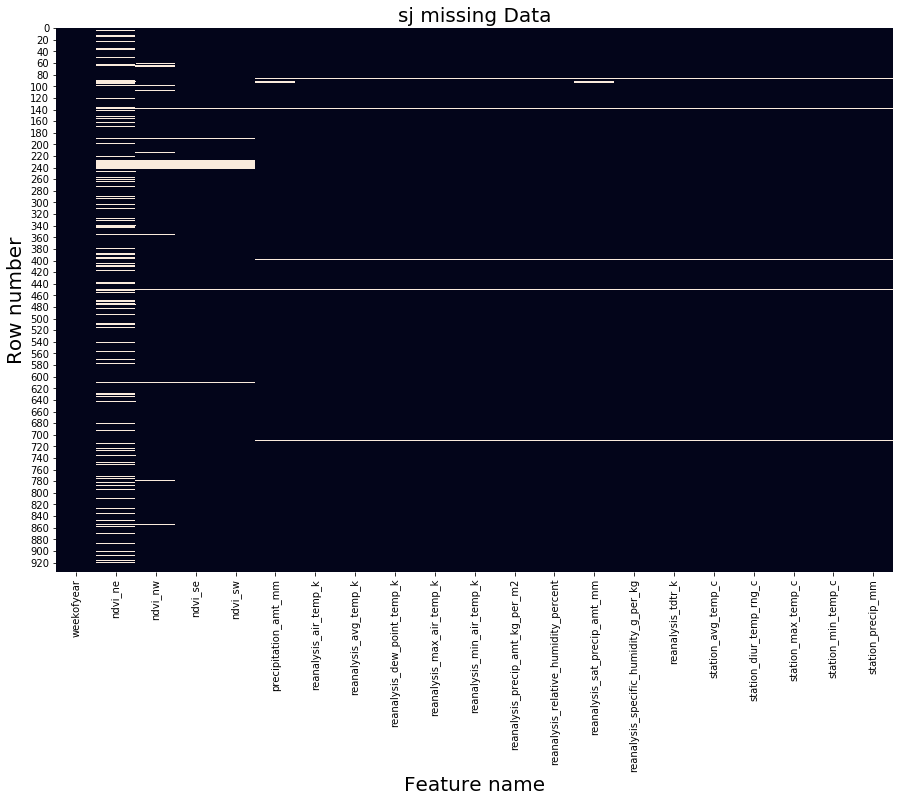

In [133]:
featureCount = 23
plotMissingData( dengue_train_sj, featureCount )

- nvdi_ne feature is more missing.
- ndvi_nw also missing in in some rows( but missing count is less ).
- In 5 rows , all the features are missing after ndvi features.

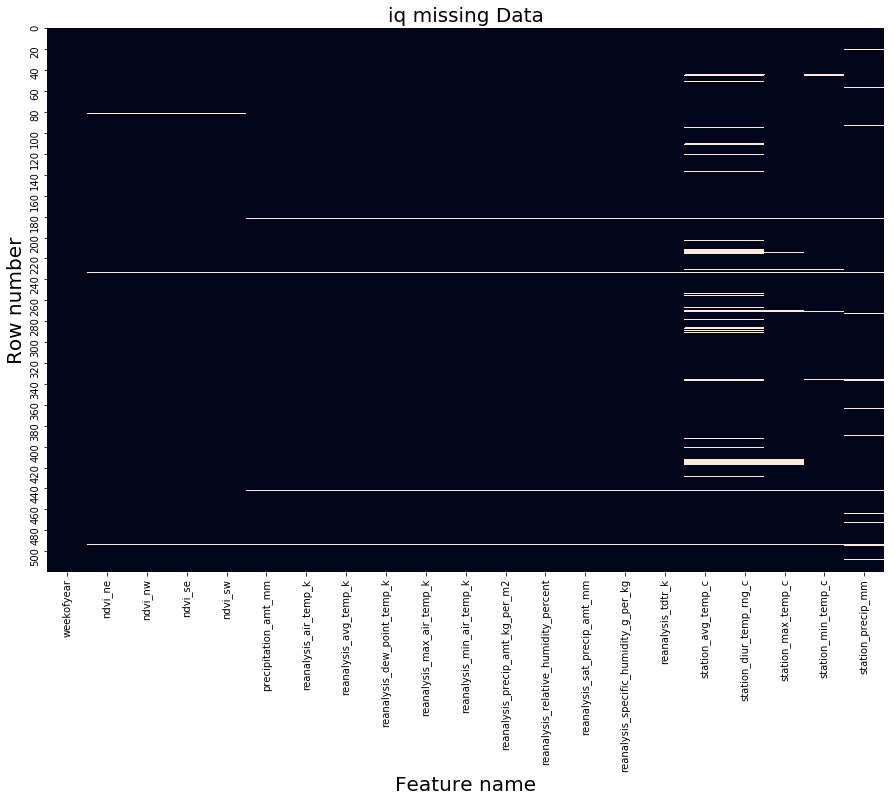

In [134]:
plotMissingData( dengue_train_iq, featureCount )

- 'station_avg_temp_c' , 'station_diur_temp_rng_c'and 'station_precip_mm' features are more missing.
- 'station_max_temp_c', 'station_min_temp_c' are  also missing in in some rows( but missing count is less ).
- In 4 rows, more than 15 features are missing.

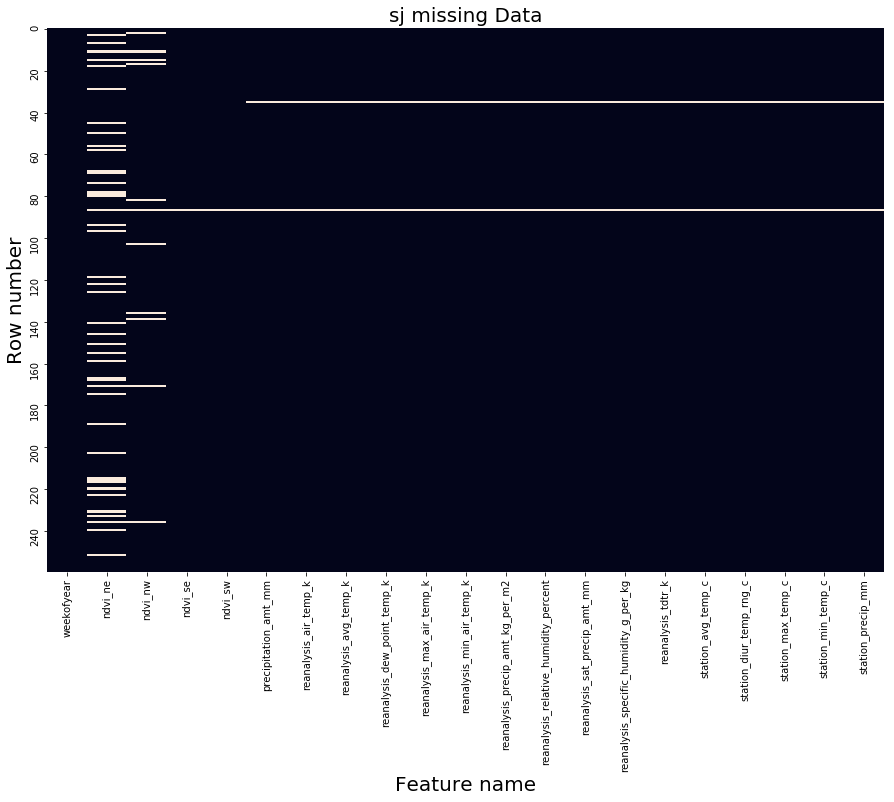

In [135]:
plotMissingData( dengue_test_sj, featureCount )

- nvdi_ne is more missing feature.
- ndvi_nw also missing in in some rows( but missing count is less ).
- In 2 rows , all the features are missing after ndvi features.

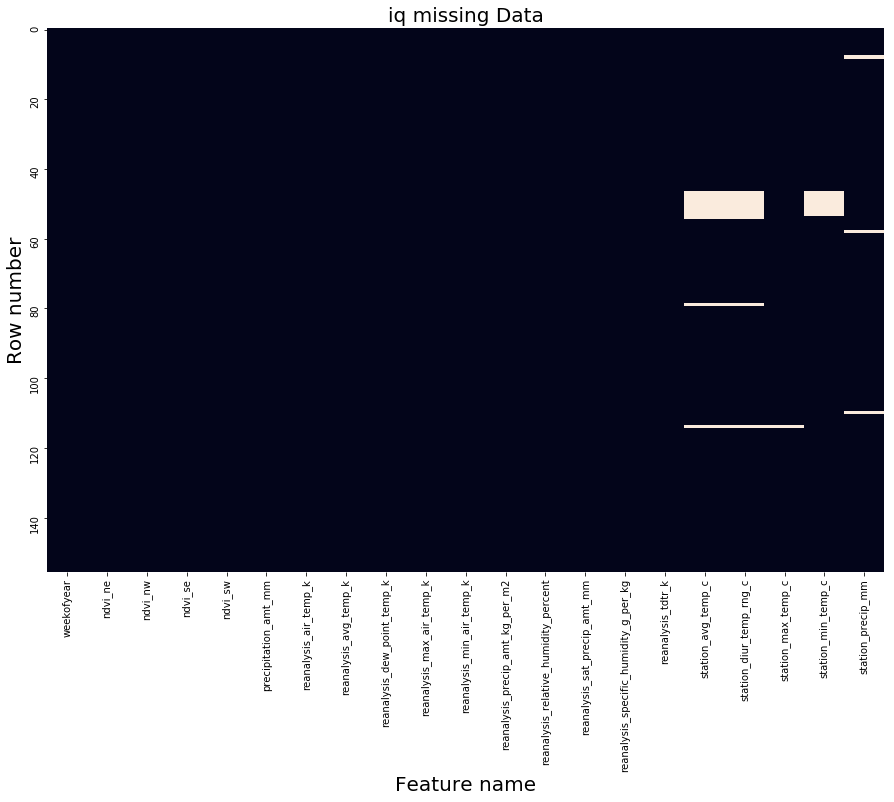

In [136]:
plotMissingData( dengue_test_iq, featureCount )

- 'station_avg_temp_c' , 'station_diur_temp_rng_c'and 'station_min_temp_c' features are more missing as continious records.
- 'station_max_temp_c' is  also missing in in some rows( but missing count is less ).

In [137]:
dengue_train_sj.describe().T

,count,mean,std,min,25%,50%,75%,max
year,936.0,1998.826923,5.212076,1990.000000,1994.000000,1999.000000,2003.000000,2008.000000
weekofyear,936.0,26.503205,15.021909,1.000000,13.750000,26.500000,39.250000,53.000000
ndvi_ne,745.0,0.057925,0.107153,-0.406250,0.004500,0.057700,0.111100,0.493400
ndvi_nw,887.0,0.067469,0.092479,-0.456100,0.016425,0.068075,0.115200,0.437100
ndvi_se,917.0,0.177655,0.057166,-0.015533,0.139283,0.177186,0.212557,0.393129
ndvi_sw,917.0,0.165956,0.056073,-0.063457,0.129157,0.165971,0.202771,0.381420
precipitation_amt_mm,927.0,35.470809,44.606137,0.000000,0.000000,20.800000,52.180000,390.600000
reanalysis_air_temp_k,930.0,299.163653,1.236429,295.938571,298.195000,299.254286,300.132857,302.200000
reanalysis_avg_temp_k,930.0,299.276920,1.218637,296.114286,298.300000,299.378571,300.228571,302.164286
reanalysis_dew_point_temp_k,930.0,295.109519,1.569943,289.642857,293.847857,295.464286,296.418929,297.795714


##### Feature Correlation Analysis

Before analysing the balance features, we can check the feature correlation.
This will give a insight to confirm whether the features are relevent or not.

In [138]:
# let us generate some correlation plots of the features to see how
#   related one feature is to the next. To do so, utilised the Seaborn plotting package
#   which allows us to plot heatmaps very conveniently as follows
def plotVarCorr( data, title ):
    colormap = plt.cm.RdBu
    plt.figure(figsize=(16,14))
    sns.heatmap( data.astype(float).corr(),linewidths=0.1,vmax=1.0, 
                 square=True, cmap=colormap, linecolor='white', annot=True)
    plt.title( title )
    filename = title + '.png'
    plt.savefig( filename )
    plt.show()

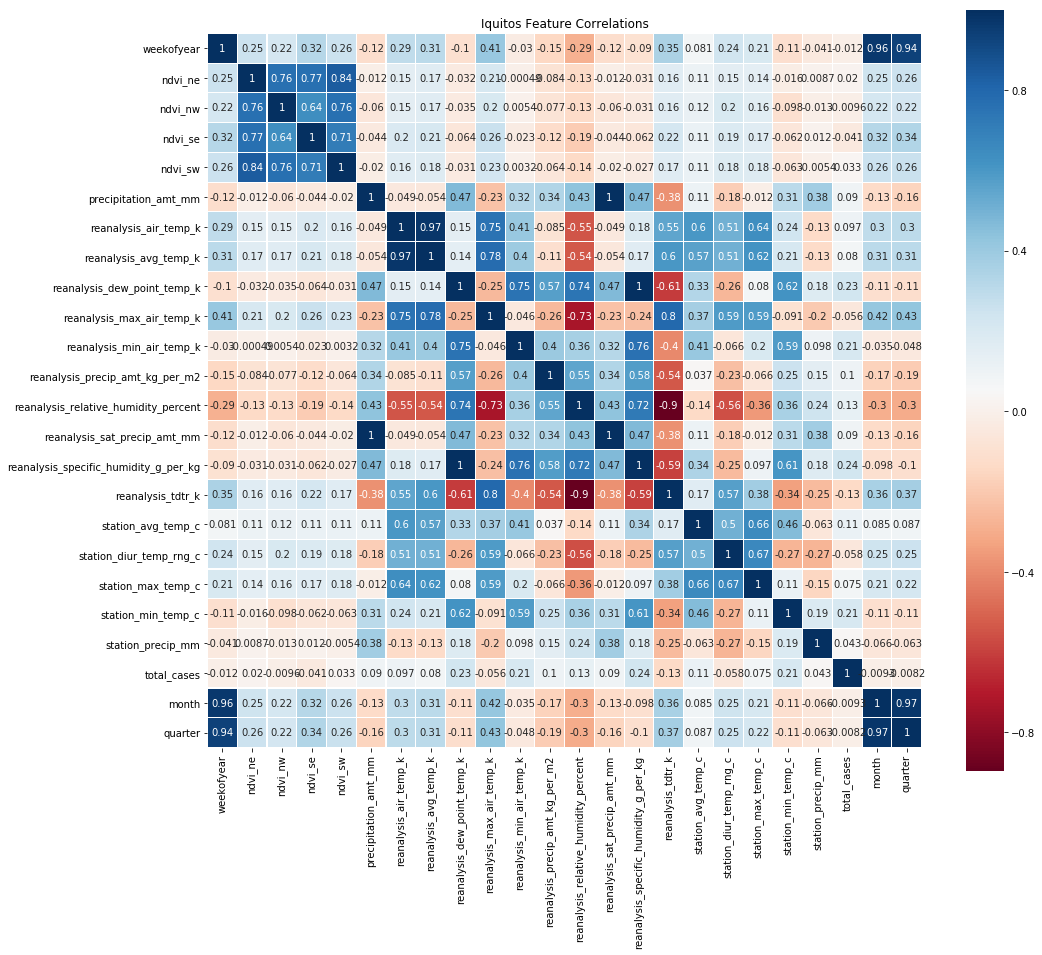

In [139]:
plotVarCorr( dengue_train_iq[dengue_train_iq.columns[2:]], 'Iquitos Feature Correlations' )

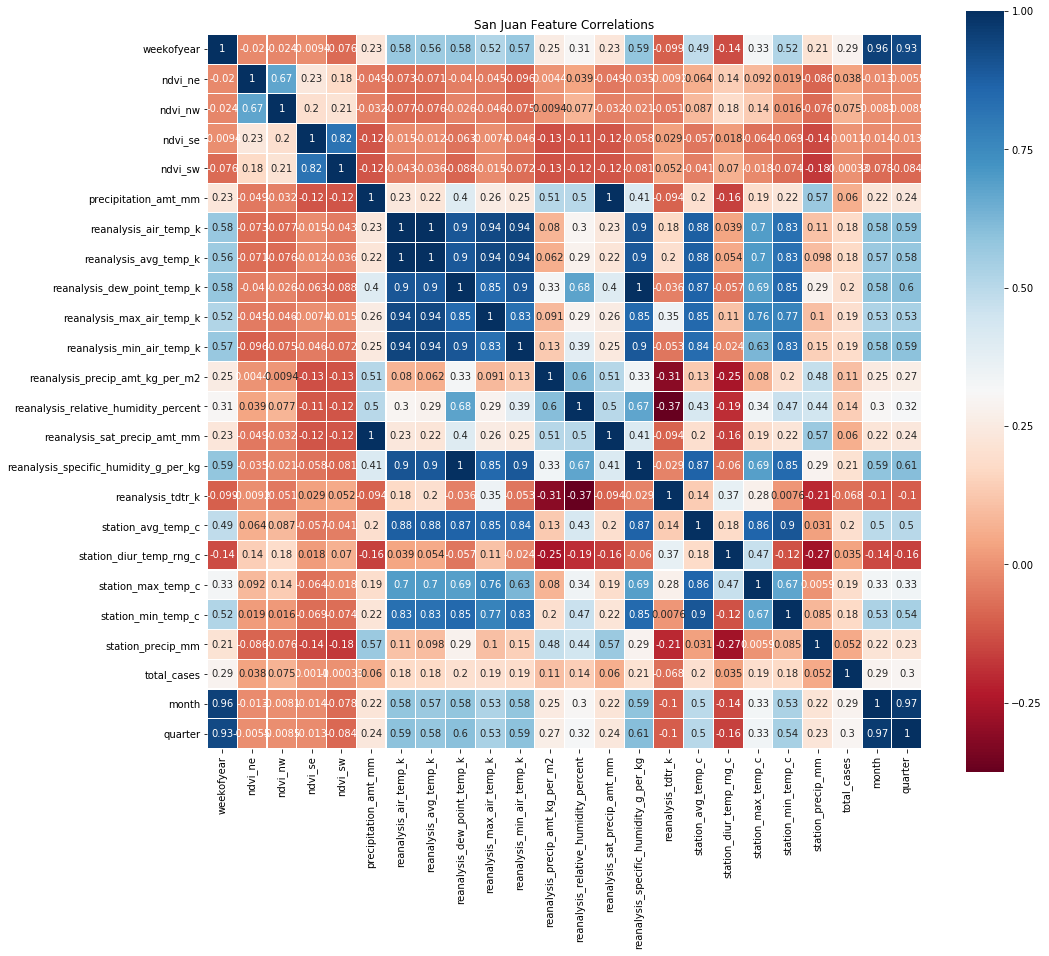

In [140]:
plotVarCorr( dengue_train_sj[dengue_train_sj.columns[2:]] ,'San Juan Feature Correlations' )

###### Takeaway from the Plots

One thing that that the Pearson Correlation plot can tell us is that there are many features strongly correlated with one another. This is not good from a point of view of feeding these features into your learning model because this means that there is much redundant or superfluous data in our training set.

###### As per the feature correlation analysis, some feature are correlated more than 90%. so we can drop one of them
###### Iquitos data
1. Features  “precipitation_amount_mm”     and “reanalysis_sat_precip_amt_mm”          were found to be 100% correlated.
2. Features  “reanalysis_dew_point_temp_k” and “reanalysis_specific_humidity_g_per_kg” were found to be  99.77% correlated.
3. Features  “reanalysis_avg_temp_k”       and “reanalysis_air_temp_k”                 were found to be  97.33% correlated.

###### San Juan data
1. Features  “precipitation_amount_mm”     and “reanalysis_sat_precip_amt_mm”          were found to be 100% correlated.
2. Features  “reanalysis_dew_point_temp_k” and “reanalysis_specific_humidity_g_per_kg” were found to be  99.85% correlated.
3. Features  “reanalysis_avg_temp_k”       and “reanalysis_air_temp_k”                 were found to be  99.75% correlated.
4. Features  “reanalysis_max_air_temp_k”   and “reanalysis_avg_temp_k”                 were found to be  93.89% correlated.
5. Features  “reanalysis_min_air_temp_k”   and “reanalysis_avg_temp_k”                 were found to be  93.91% correlated.
6. Features  "reanalysis_dew_point_temp_k" and “reanalysis_air_temp_k”                 were found to be  90.33% correlated.

Based on the value reanalysis, we will decide feature deletion

##### Pairplots

Finally let us generate some pairplots to observe the distribution of data from one feature to the other.

In [ ]:
# plotting of pairwise relationships
sns.pairplot( dengue_train_sj, x_vars=['ndvi_ne', 'ndvi_nw', 'ndvi_se','ndvi_sw'], y_vars=['total_cases'], kind="reg")
sns.pairplot( dengue_train_sj, x_vars=['precipitation_amt_mm', 'reanalysis_precip_amt_kg_per_m2', 
                                       'reanalysis_relative_humidity_percent','reanalysis_specific_humidity_g_per_kg',
                                       'reanalysis_sat_precip_amt_mm'], y_vars=['total_cases'], kind="reg")
sns.pairplot( dengue_train_sj, x_vars=[ 'reanalysis_air_temp_k',
                                        'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
                                        'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
                                       'reanalysis_tdtr_k'], y_vars=['total_cases'], kind="reg")
sns.pairplot( dengue_train_sj, x_vars=['station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
                                       'station_min_temp_c', 'station_precip_mm'], y_vars=['total_cases'], kind="reg")
sns.pairplot( dengue_train_sj, x_vars=['month', 'quarter'], y_vars=['total_cases'], kind="reg")
#sns.pairplot( dengue_train_sj, x_vars=['month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6'], y_vars=['total_cases'], kind="reg")
#sns.pairplot( dengue_train_sj, x_vars=['month_7','month_8', 'month_9', 'month_10', 'month_11', 'month_12'], y_vars=['total_cases'], kind="reg")
#sns.pairplot( dengue_train_sj, x_vars=['quarter_1','quarter_2', 'quarter_3', 'quarter_4'], y_vars=['total_cases'], kind="reg")

# Based on the model results, the month and quarter categorical features are not helping the model much, so we are commenting it.

In [ ]:
# plotting of pairwise relationships
sns.pairplot( dengue_train_iq, x_vars=['ndvi_ne', 'ndvi_nw', 'ndvi_se','ndvi_sw'],
                               y_vars=['total_cases'], kind="reg")
sns.pairplot( dengue_train_iq, x_vars=['precipitation_amt_mm', 'reanalysis_precip_amt_kg_per_m2', 
                                       'reanalysis_relative_humidity_percent',
                                       'reanalysis_specific_humidity_g_per_kg',
                                       'reanalysis_sat_precip_amt_mm'],
                                        y_vars=['total_cases'], kind="reg")
sns.pairplot( dengue_train_iq, x_vars=[ 'reanalysis_air_temp_k',
                                        'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
                                        'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
                                       'reanalysis_tdtr_k'],
                                        y_vars=['total_cases'], kind="reg")
sns.pairplot( dengue_train_iq, x_vars=['station_avg_temp_c', 'station_diur_temp_rng_c',
                                       'station_max_temp_c', 'station_min_temp_c',
                                       'station_precip_mm'],
                                        y_vars=['total_cases'], kind="reg")
sns.pairplot( dengue_train_iq, x_vars=['month', 'quarter'], y_vars=['total_cases'], kind="reg")
#sns.pairplot( dengue_train_iq, x_vars=['month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6'], y_vars=['total_cases'], kind="reg")
#sns.pairplot( dengue_train_iq, x_vars=['month_7','month_8', 'month_9', 'month_10', 'month_11', 'month_12'], y_vars=['total_cases'], kind="reg")
#sns.pairplot( dengue_train_iq, x_vars=['quarter_1','quarter_2', 'quarter_3', 'quarter_4'], y_vars=['total_cases'], kind="reg")
# Based on the model results, the month and quarter categorical features are not helping the model much, so we are commenting it.

Individually we analyzed each features in Dengue_LinearRegression.ipynb. As per the analysis, interpolation is required to fix the missing data.
In Dengue_LinearRegression.ipynb, we verified the below cases of each feature
1. Number of missing cases
2. The data is missing continiously or not.
3. Wheather the feature is depend upon any other feature or not.
    3.a For Max_temp type features, confirmed that, its more than min and avg fearures
    3.b Avg features calculated bases on Min and max. And compared with interpolate result. There is no adavantage, so we are going with interpolate for all features
4. Compared the model results with time interpolated data too. As per our data, thete is no missing weeks, so there is no change in interpolation.

###### Unit conversion( Kelvin to Celsius )
To set same type of units for all similar features, Temperatures in Kelvin are converted to Celsius using the equation
- TemperatureCelsius = TemperatureKelvin – 273.15

In [ ]:
dengue_train_iq.reanalysis_tdtr_k.describe()

reanalysis_tdtr_k is the diurnal temperature range (DTR). This is the difference between the daily maximum and minimum temperature. So no conversion is required.

In [ ]:
def KelvinToCelsius( data ):
    k_to_c_conversion_factor = 273.15
    # The below features are in kelivin, converting that to celsius   
    data['reanalysis_min_air_temp_k']   = data['reanalysis_min_air_temp_k'] - k_to_c_conversion_factor
    data['reanalysis_max_air_temp_k']   = data['reanalysis_max_air_temp_k'] - k_to_c_conversion_factor
    data['reanalysis_air_temp_k']       = data['reanalysis_air_temp_k'] - k_to_c_conversion_factor
    data['reanalysis_dew_point_temp_k'] = data['reanalysis_dew_point_temp_k'] - k_to_c_conversion_factor
    data['reanalysis_avg_temp_k']       = data['reanalysis_avg_temp_k'] - k_to_c_conversion_factor
    col = data.columns                          
    col = col.str.replace('temp_k', 'temp_c')    # converting to the column name to _c from _k
    data.columns = col.str.replace('tdtr_k', 'tdtr_c')
    return data

In [ ]:
def prePorcessData( data ):
    data = KelvinToCelsius( data )
#    Not deleting now, based on model, we can decide it later
#    data.drop( columns='reanalysis_avg_temp_c', inplace=True)
#    data.drop( columns='reanalysis_dew_point_temp_c', inplace=True)
#    data.drop( columns='reanalysis_sat_precip_amt_mm', inplace=True)
    data.interpolate( inplace = True )
    return data

In [ ]:
# In preprocessing, we are doing the unit conversion ( kelvin to celsious ) and names conversion ( _k to _c )
#   And filling the missing data  using interpolate function
dengue_train_iq = prePorcessData( dengue_train_iq )
dengue_train_sj = prePorcessData( dengue_train_sj )
dengue_test_iq  = prePorcessData( dengue_test_iq )
dengue_test_sj  = prePorcessData( dengue_test_sj )

In [ ]:
# confirming the preprocessed output
dengue_train_iq.describe().T

In [ ]:
# confirming the preprocessed output
dengue_train_sj.describe().T

###### New features exploration

As per the score and graphs, the model is not meeting to the expectation. Looks like we need to generate new features.

In the disease information, we got an idea about the mosquito life cycle and weather factors affecting dengue fever.

So we need to consider the weather factors of earlier weeks to identify the actual reason behind the disease spread.

In [ ]:
dengue_train_sj.describe()

In [ ]:
#  New features from Satellite vegetation - Normalized difference vegetation index (NDVI)
# ndvi_se – Pixel southeast of city centroid
# ndvi_sw – Pixel southwest of city centroid
# ndvi_ne – Pixel northeast of city centroid
# ndvi_nw – Pixel northwest of city centroid
dengue_train_sj['ndvi_mean'] = dengue_train_sj[dengue_train_sj.columns[3:7]].mean(axis = 1)
dengue_train_iq['ndvi_mean'] = dengue_train_iq[dengue_train_iq.columns[3:7]].mean(axis = 1)
dengue_test_sj ['ndvi_mean']  = dengue_test_sj[ dengue_test_sj.columns [3:7]].mean(axis = 1)
dengue_test_iq ['ndvi_mean']  = dengue_test_iq[ dengue_test_iq.columns [3:7]].mean(axis = 1)
# creating the mean of vegetation index

In [ ]:
# Trying with with different rolling window  periods
seven_weeks = 7
six_weeks = 6
five_weeks = 5
four_weeks = 4
three_weeeks = 3
two_weeks = 2

sj_lag = four_weeks
iq_lag = five_weeks

As per the trials, we got know that, the four weeks roolling features for San Juan is getting good results. For Iquitos, five weeks rolling features are good.

In [ ]:
# New rolling window features using Sum, Mean and Vaariance.
def addNewRolliingFeatures( data, columns, lagTime ):
    for col in columns:
        data[col + '_lagSum']  = data[col].rolling( lagTime ).sum()
        data[col + '_lagMean'] = data[col].rolling( lagTime ).mean()
        data[col + '_lagVar']  = data[col].rolling( lagTime ).var()
    return data

###### Data Splitting

In [ ]:
def split_data( data, split_date ):
    return data[data.index <= split_date].copy(), \
           data[data.index >  split_date].copy()

For test data, we need to add some last records of train data for rolling. Otherwise missing data will come for the lag window records. To overcome that, we are adding the records from train data set( the data is continious ). Or we can combine the full data set and do the feature generation using rolling window. Now we are going with split data itself.

In [ ]:
# Based on the rolling window timeperiod,
#  ( window period - 1 ) records are splitting from train and planning to add it with test dat set.
split_date_for_test_iq = '28-May-2010'
split_date_for_test_sj = '01-Apr-2008'
temp, roll_data_for_test_iq = split_data( dengue_train_iq, split_date_for_test_iq )
temp, roll_data_for_test_sj = split_data( dengue_train_sj, split_date_for_test_sj )

In [ ]:
# the total_cases column is not there in test data, so we are droping the column to make a combined data set.
roll_data_for_test_sj.drop( columns = ['total_cases'], inplace = True )
roll_data_for_test_iq.drop( columns = ['total_cases'], inplace = True )

In [ ]:
# Making a new data set by appending the split data from train and full test data set.
dengue_test_iq = roll_data_for_test_iq.append( dengue_test_iq, sort=True )
dengue_test_sj = roll_data_for_test_sj.append( dengue_test_sj, sort=True )

In [ ]:
# More correlated features are considered for rolling window
# roling features are not required for year, month and quarter
roll_sj_Col = abs(dengue_train_sj.corr()).total_cases.drop(['total_cases','quarter', 'weekofyear', 'month', 'year']).sort_values(ascending = False).index[0:20]
roll_iq_Col = abs(dengue_train_iq.corr()).total_cases.drop(['total_cases','quarter', 'weekofyear', 'month', 'year']).sort_values(ascending = False).index[0:20]

In [ ]:
dengue_train_iq = addNewRolliingFeatures( dengue_train_iq, roll_iq_Col, iq_lag )
dengue_train_sj = addNewRolliingFeatures( dengue_train_sj, roll_sj_Col, sj_lag )
dengue_test_iq  = addNewRolliingFeatures( dengue_test_iq, roll_iq_Col, iq_lag )
dengue_test_sj  = addNewRolliingFeatures( dengue_test_sj, roll_sj_Col, sj_lag )

In [ ]:
# trimming the lagged data( NaN data) created after rolling window
split_date_for_test_iq = '25-Jun-2010'
split_date_for_test_sj = '22-Apr-2008'
split_date_for_train_iq = '22-Jul-2000'
split_date_for_train_sj = '14-May-1990'
temp, dengue_test_iq = split_data( dengue_test_iq, split_date_for_test_iq )
temp, dengue_test_sj = split_data( dengue_test_sj, split_date_for_test_sj )
temp, dengue_train_iq = split_data( dengue_train_iq, split_date_for_train_iq )
temp, dengue_train_sj = split_data( dengue_train_sj, split_date_for_train_sj )

In [ ]:
# save to pickle file
dengue_train_iq.to_pickle('./../datasets/dengue_train_iq.pkl')
dengue_train_sj.to_pickle('./../datasets/dengue_train_sj.pkl')
dengue_test_iq.to_pickle('./../datasets/dengue_test_iq.pkl')
dengue_test_sj.to_pickle('./../datasets/dengue_test_sj.pkl')

In [ ]:
# checking the correlation after data cleaning and EDA
#import pandas_profiling
#pandas_profiling.ProfileReport(dengue_test_sj)

###### lets check the monthwise data. Based on that, we can confirm that whether we need to split the data based on month or not.

In [ ]:
data_train_sj_month1 = dengue_train_sj[dengue_train_sj['month'] == 1]
data_train_sj_month2 = dengue_train_sj[dengue_train_sj['month'] == 2]

In [ ]:
data_train_sj_month1.describe()

In [ ]:
dengue_train_sj.describe()

As per the statistical description, monthly split will give better model result compared to the full data set. Based on that, data is splitted in month wise.

In [ ]:
# based on the month, we are splitting the data
def createMonthwiseData( data, base_filename ):
    for month in range( 1, 13 ):
        temp = data[data['month'] == month]
        temp.to_pickle('./../datasets/' + base_filename + '_month_' + str(month) + '.pkl' )

In [ ]:
# serialize the data into character stream
createMonthwiseData( dengue_train_iq, 'train_iq' )
createMonthwiseData( dengue_train_sj, 'train_sj' )
createMonthwiseData( dengue_test_iq, 'test_iq' )
createMonthwiseData( dengue_test_sj, 'test_sj' )